In [1]:
import tensorflow as tf

In [2]:
import splitfolders

In [13]:
input_folder=r'C:\Users\Madhur\Desktop\Final Year project\teeth_dataset\Dataset'

In [15]:
splitfolders.ratio(input_folder,output=r'C:\Users\Madhur\Desktop\Final Year project\teeth_dataset\Dataset',seed=101,ratio=(.8,.1,.1))

Copying files: 1554 files [00:03, 475.59 files/s]


In [16]:
from keras.preprocessing.image import ImageDataGenerator
tf.__version__


'2.9.1'

In [17]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [18]:
BATCH_SIZE=32
IMAGE_SIZE=256
CHANNEL=3
EPOCH=10

In [21]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
            r'C:\Users\Madhur\Desktop\Final Year project\teeth_dataset\Dataset',
            seed=101,
            shuffle=True,
            image_size=(256,256),
            batch_size=32
            
)

Found 1554 files belonging to 2 classes.


In [22]:
class_names=dataset.class_names

In [29]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch)

(32, 256, 256, 3)
tf.Tensor([1 0 1 1 1 1 1 0 1 1 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0], shape=(32,), dtype=int32)


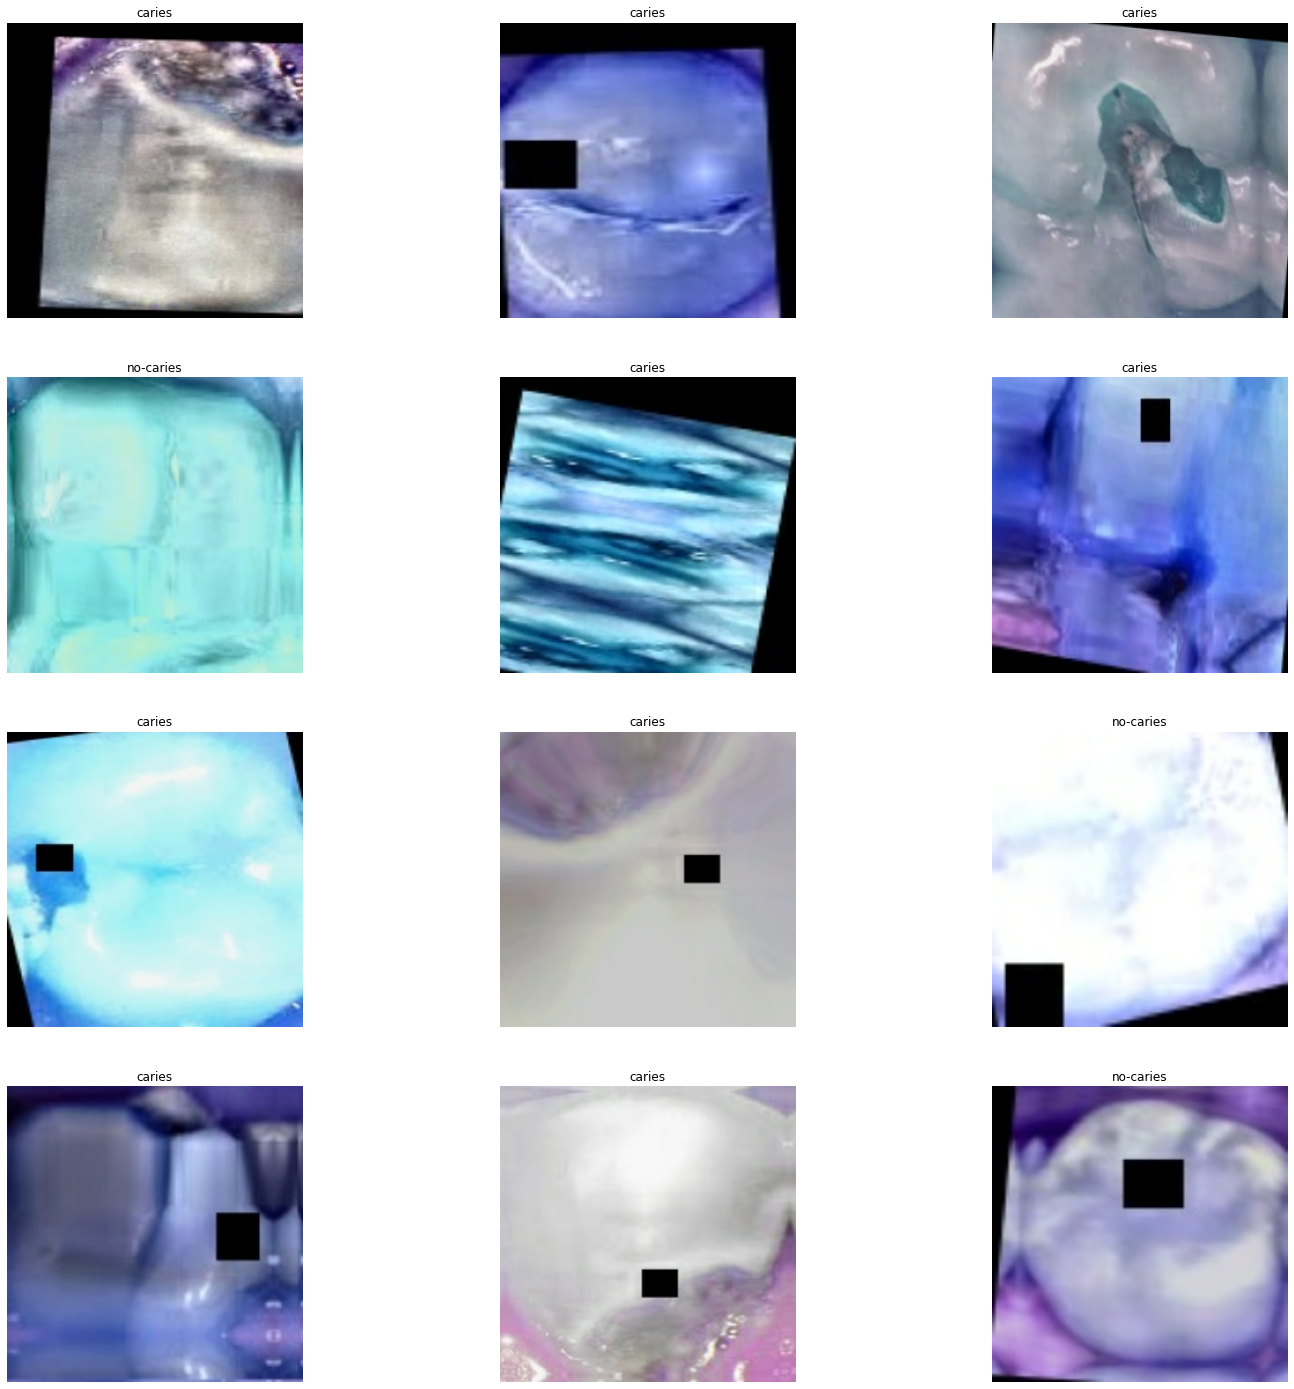

In [35]:
plt.figure(figsize=(25, 25))
for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(4, 3, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [36]:
len(dataset)

49

In [37]:
train_size=0.8
len(dataset)*train_size

39.2

In [38]:
train_ds = dataset.take(39)
len(train_ds)

39

In [39]:
test_ds = dataset.skip(39)
len(test_ds)

10

In [40]:
val_ds = test_ds.take(5)
len(val_ds)

5

In [41]:
val_size=0.1
len(dataset)*val_size

4.9

In [42]:
test_ds = test_ds.skip(5)
len(test_ds)

5

In [43]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
   
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [44]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf (dataset)

In [45]:
len(train_ds)

39

In [46]:
len(test_ds)

6

In [47]:
len(val_ds)

4

In [48]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [49]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(256, 256),
  layers.experimental.preprocessing.Rescaling(1./255),
])

In [50]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.3),
])

In [51]:
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)



In [56]:
CHANNELS=3
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 1

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='sigmoid'),
])

model.build(input_shape=input_shape)

In [57]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 256, 256, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (32, 127, 127, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (32, 60, 60, 64)         

In [58]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [59]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=5,
)

Epoch 1/5
39/39 [==============================] - 43s 1s/step - loss: 0.5648 - accuracy: 0.7496 - val_loss: 0.6569 - val_accuracy: 0.7344
Epoch 2/5
39/39 [==============================] - 38s 977ms/step - loss: 0.4642 - accuracy: 0.7682 - val_loss: 0.4162 - val_accuracy: 0.8203
Epoch 3/5
39/39 [==============================] - 38s 965ms/step - loss: 0.4469 - accuracy: 0.7812 - val_loss: 0.4325 - val_accuracy: 0.7734
Epoch 4/5
39/39 [==============================] - 38s 977ms/step - loss: 0.4150 - accuracy: 0.8104 - val_loss: 0.3532 - val_accuracy: 0.8906
Epoch 5/5
39/39 [==============================] - 39s 1s/step - loss: 0.3933 - accuracy: 0.8274 - val_loss: 0.3761 - val_accuracy: 0.8047


In [60]:
scores = model.evaluate(test_ds)

6/6 [==============================] - 2s 211ms/step - loss: 0.3616 - accuracy: 0.8073


In [61]:
scores

[0.36158880591392517, 0.8072916865348816]

In [62]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

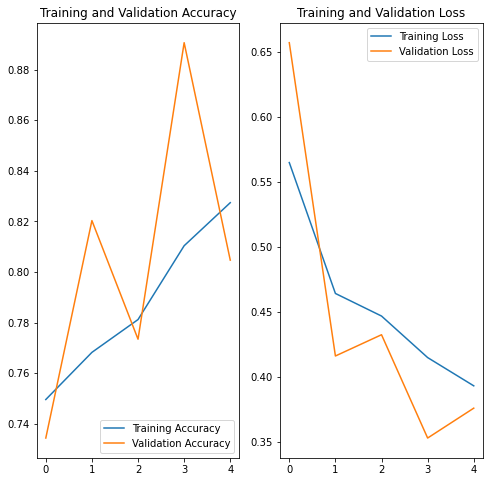

In [64]:
EPOCHS=5
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: caries
1/1 [==============================] - 1s 519ms/step
predicted label: caries


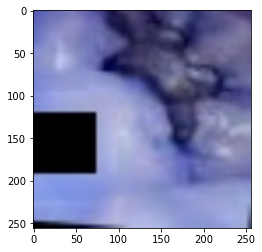

In [65]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [66]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 32ms/step


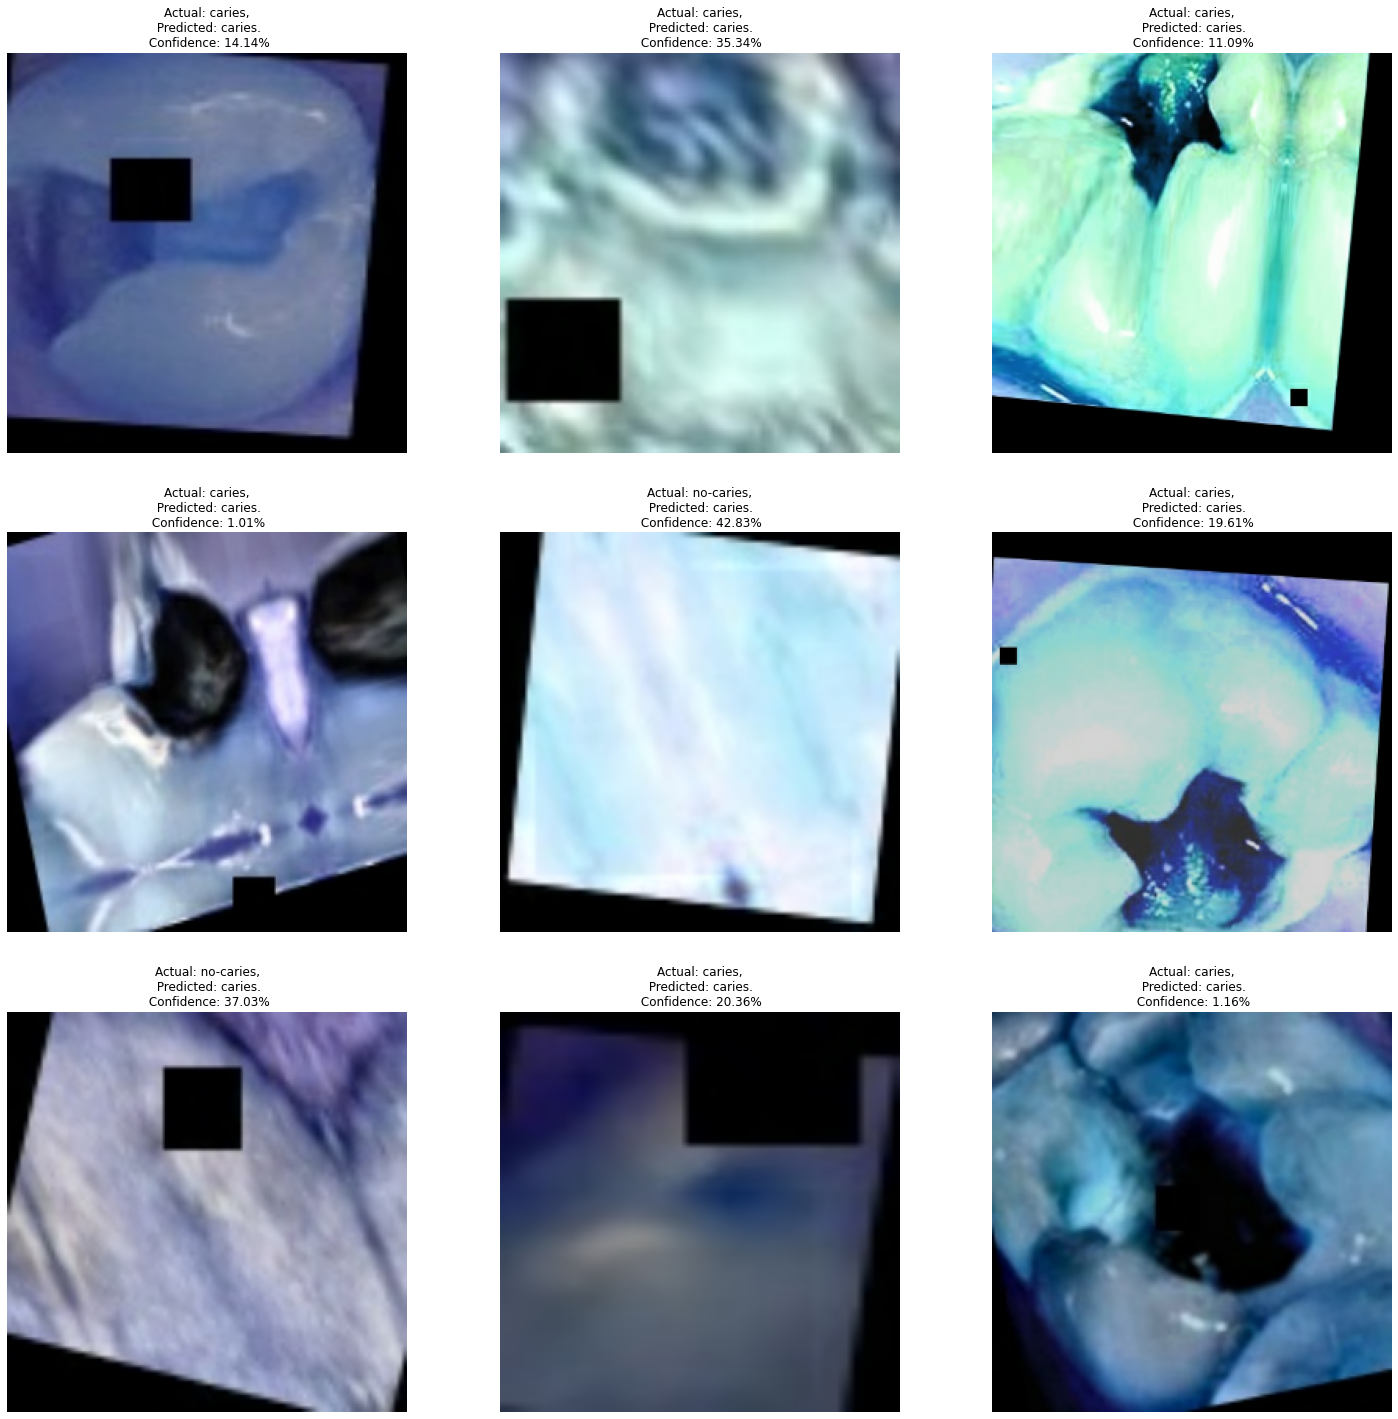

In [71]:
plt.figure(figsize=(25, 25))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")